<a href="https://colab.research.google.com/github/EgorSolovei/ML-in-nuclear-physics/blob/main/GBDT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn.metrics as metrics

from sklearn.model_selection import GridSearchCV
from google.colab import drive

drive.mount('/content/drive/')

Mounted at /content/drive/


# Load data

In [2]:
data = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/Курсовая/data.csv')
data.drop(columns='Unnamed: 0', inplace=True)
data = data.rename(columns={"class": "class_param"})
data.head()

,class_param,sns_1_sct_1_plus,sns_1_sct_1_minus,sns_1_sct_2_plus,sns_1_sct_2_minus,sns_1_sct_3_plus,sns_1_sct_3_minus,sns_1_sct_4_plus,sns_1_sct_4_minus,sns_1_sct_5_plus,...,sns_3_sct_28_plus,sns_3_sct_28_minus,sns_3_sct_29_plus,sns_3_sct_29_minus,sns_3_sct_30_plus,sns_3_sct_30_minus,sns_3_sct_31_plus,sns_3_sct_31_minus,sns_3_sct_32_plus,sns_3_sct_32_minus
0,2.0,1.070476,1.134191,1.061568,1.063757,1.056732,1.071109,1.063262,1.074886,1.249140,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4.0,1.062580,0.000000,0.000000,0.000000,1.610508,1.232604,0.000000,1.184101,1.320536,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,1.067535,1.051729,1.054481,1.057698,1.055646,1.062432,1.071453,1.064985,1.065528,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,1.088980,1.055896,1.061196,1.138536,1.091437,1.074876,1.061321,1.082646,1.095676,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2.0,1.081317,1.061869,1.053991,1.112041,1.073001,1.089580,1.092859,1.097151,1.048954,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
 # где-то плохая обработка, потому что классов только 4. Уберём плохие
data['class_param'].unique()

array([ 2.,  4.,  1.,  3.,  0., nan])

In [4]:
data.class_param.fillna(0, inplace=True)
data = data.query('class_param != 0')
data['class_param'].unique()

array([2., 4., 1., 3.])

In [5]:
data = data.astype({'class_param': 'int'})
data.head()

,class_param,sns_1_sct_1_plus,sns_1_sct_1_minus,sns_1_sct_2_plus,sns_1_sct_2_minus,sns_1_sct_3_plus,sns_1_sct_3_minus,sns_1_sct_4_plus,sns_1_sct_4_minus,sns_1_sct_5_plus,...,sns_3_sct_28_plus,sns_3_sct_28_minus,sns_3_sct_29_plus,sns_3_sct_29_minus,sns_3_sct_30_plus,sns_3_sct_30_minus,sns_3_sct_31_plus,sns_3_sct_31_minus,sns_3_sct_32_plus,sns_3_sct_32_minus
0,2,1.070476,1.134191,1.061568,1.063757,1.056732,1.071109,1.063262,1.074886,1.249140,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4,1.062580,0.000000,0.000000,0.000000,1.610508,1.232604,0.000000,1.184101,1.320536,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,1.067535,1.051729,1.054481,1.057698,1.055646,1.062432,1.071453,1.064985,1.065528,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,1.088980,1.055896,1.061196,1.138536,1.091437,1.074876,1.061321,1.082646,1.095676,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2,1.081317,1.061869,1.053991,1.112041,1.073001,1.089580,1.092859,1.097151,1.048954,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<Axes: >

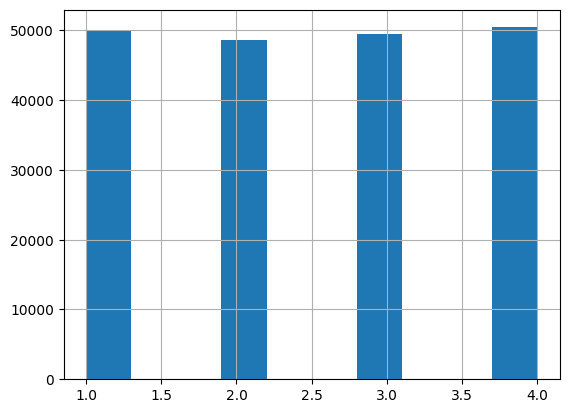

In [6]:
data.class_param.hist()

In [7]:
data.shape

(198649, 193)

# Models

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
Y = data['class_param']
X = data.drop(columns='class_param')

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.7, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((139054, 192), (59595, 192), (139054,), (59595,))

## XGBoost

In [ ]:
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier

le = LabelEncoder()

# сделаем преобразование классов, для работы алгоритма
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)
y_train, y_test

(array([2, 1, 0, ..., 3, 3, 0]), array([0, 3, 1, ..., 1, 0, 0]))

In [ ]:
# шаг и дипазон learning_rate можно увеличить
params = {'n_estimators': range(10, 101, 10), 'max_depth': range(3, 8), 'learning_rate': np.arange(0.01, 0.101, 0.01)}

xgb_cl = XGBClassifier(tree_method='gpu_hist')
xgb_cv = GridSearchCV(xgb_cl, params, cv=4)

In [ ]:
xgb_cv.fit(X_train.values, y_train)

GridSearchCV(cv=4,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ]),
                         'max_depth': range(3, 8),
                         'n_estimators': range(10, 101, 10)})

In [ ]:
xgb_cv.best_params_, xgb_cv.best_score_

({'learning_rate': 0.09999999999999999, 'max_depth': 7, 'n_estimators': 100},
 0.8586448340860693)

In [ ]:
xgb_res_df = pd.DataFrame(xgb_cv.cv_results_)
xgb_res_df.drop(columns=["params"], inplace=True)
xgb_res_df.shape

(500, 14)

In [ ]:
xgb_res_df.sort_values('rank_test_score', ascending=True)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_n_estimators,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
499,6.452583,0.095999,0.523095,0.051811,0.1,7,100,0.859970,0.858561,0.854759,0.861289,0.858645,0.002442,1
489,5.275660,0.046888,0.498698,0.091533,0.1,6,100,0.859999,0.858561,0.854702,0.860254,0.858379,0.002219,2
449,6.443834,0.039641,0.503993,0.005835,0.09,7,100,0.858273,0.858676,0.855565,0.860743,0.858314,0.001843,3
498,5.991061,0.018697,0.501243,0.074779,0.1,7,90,0.858992,0.856863,0.853666,0.860800,0.857581,0.002655,4
488,5.017816,0.178123,0.365953,0.008360,0.1,6,90,0.859165,0.857813,0.853925,0.859391,0.857573,0.002191,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2,2.836603,0.461674,0.096514,0.025740,0.01,3,30,0.741284,0.744650,0.738860,0.738112,0.740727,0.002550,496
100,2.270525,0.223804,0.067034,0.017569,0.03,3,10,0.742233,0.743557,0.736990,0.739838,0.740655,0.002500,497
1,3.131795,1.573197,0.069685,0.003439,0.01,3,20,0.730440,0.734064,0.729252,0.728850,0.730651,0.002055,498
50,2.223885,0.196239,0.072185,0.015726,0.02,3,10,0.729490,0.731964,0.728591,0.727267,0.729328,0.001715,499


<Axes: xlabel='param_n_estimators', ylabel='mean_test_score'>

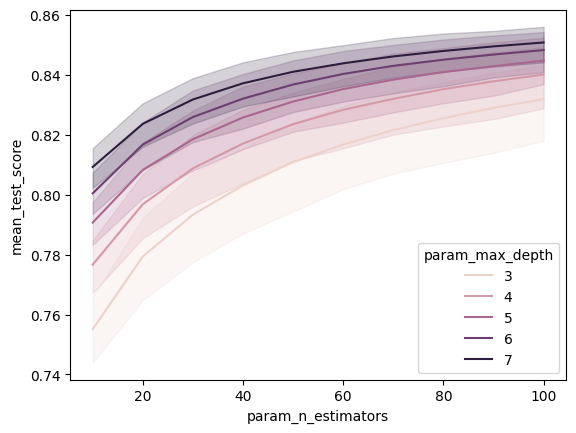

In [ ]:
sns.lineplot(x='param_n_estimators', y='mean_test_score', hue='param_max_depth', data=xgb_res_df)

In [ ]:
best_xgb = xgb_cv.best_estimator_

In [ ]:
y_pred = best_xgb.predict(X_test)

metrics.accuracy_score(y_test, y_pred) # значенния accuracy

0.8580921218223005

In [ ]:
train_score = best_xgb.score(X_train, y_train)
test_score = best_xgb.score(X_test, y_test)

train_score, test_score

(0.9193334963395515, 0.8580921218223005)

<Axes: >

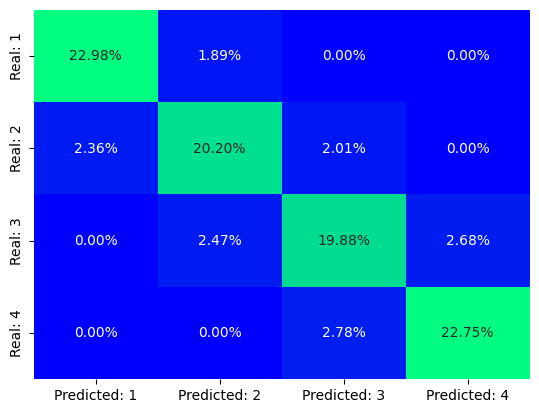

In [ ]:
y_pred = best_xgb.predict(X_test)

x_names = ['Predicted: 1', 'Predicted: 2', 'Predicted: 3', 'Predicted: 4']
y_names = ['Real: 1', 'Real: 2', 'Real: 3', 'Real: 4']

arr_errors = (metrics.confusion_matrix(y_test, y_pred) / y_test.shape[0])
sns.heatmap(arr_errors, cmap='winter', annot=True, fmt=".2%", cbar=False, xticklabels=x_names, yticklabels=y_names)

In [ ]:
import pickle

with open('best_XGBmodel.pkl', 'wb') as f: # сохранили лучшую модель xgboost
    pickle.dump(best_xgb, f)

### Load model

In [ ]:
import pickle

with open('best_XGBmodel.pkl', 'rb') as f:
    best_xgb = pickle.load(f)

best_xgb

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.09999999999999999,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

## CatBoost

In [11]:
%%capture
! pip install catboost

In [12]:
from catboost import CatBoostClassifier, Pool

In [32]:
cat_clf = CatBoostClassifier(iterations=300, learning_rate=0.1, max_depth=8,
                             loss_function='MultiClass', task_type='GPU')

In [33]:
cat_clf.fit(X_train, y_train, eval_set=(X_test, y_test), verbose=25)

0:	learn: 1.2511764	test: 1.2518935	best: 1.2518935 (0)	total: 118ms	remaining: 35.2s
25:	learn: 0.4636008	test: 0.4722358	best: 0.4722358 (25)	total: 884ms	remaining: 9.31s
50:	learn: 0.3630546	test: 0.3771530	best: 0.3771530 (50)	total: 1.33s	remaining: 6.5s
75:	learn: 0.3292337	test: 0.3491369	best: 0.3491369 (75)	total: 1.77s	remaining: 5.22s
100:	learn: 0.3119336	test: 0.3374920	best: 0.3374920 (100)	total: 2.21s	remaining: 4.36s
125:	learn: 0.3007511	test: 0.3311615	best: 0.3311615 (125)	total: 2.64s	remaining: 3.64s
150:	learn: 0.2922506	test: 0.3272844	best: 0.3272844 (150)	total: 3.08s	remaining: 3.04s
175:	learn: 0.2851529	test: 0.3245267	best: 0.3245267 (175)	total: 3.5s	remaining: 2.47s
200:	learn: 0.2792047	test: 0.3227145	best: 0.3227145 (200)	total: 3.92s	remaining: 1.93s
225:	learn: 0.2741605	test: 0.3216518	best: 0.3216518 (225)	total: 4.35s	remaining: 1.42s
250:	learn: 0.2692479	test: 0.3206685	best: 0.3206685 (250)	total: 4.77s	remaining: 931ms
275:	learn: 0.2647764	

In [34]:
train_score = cat_clf.score(X_train, y_train)
test_score = cat_clf.score(X_test, y_test)

train_score, test_score

(0.8921426208523308, 0.8612635288195318)

<Axes: >

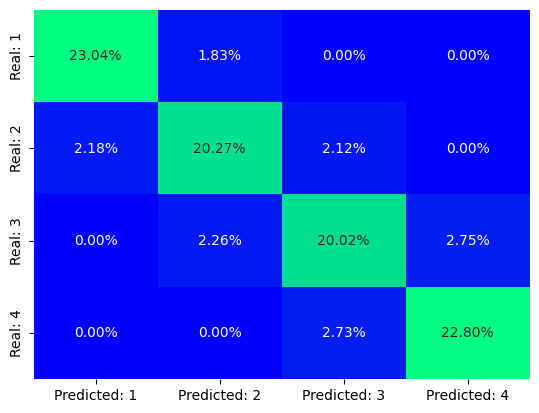

In [30]:
y_pred = cat_clf.predict(X_test)

x_names = ['Predicted: 1', 'Predicted: 2', 'Predicted: 3', 'Predicted: 4']
y_names = ['Real: 1', 'Real: 2', 'Real: 3', 'Real: 4']

arr_errors = (metrics.confusion_matrix(y_test, y_pred) / y_test.shape[0])
sns.heatmap(arr_errors, cmap='winter', annot=True, fmt=".2%", cbar=False, xticklabels=x_names, yticklabels=y_names)

## LigthGBM